In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
PLTR_1Y = pd.read_csv('output/1d/PLTR.csv')

In [50]:
PLTR_1Y.describe(include='all')

,Datetime,Open,High,Low,Close,Volume,rsi,macd,obv,so,action,change_pct,change_shares,profits,shares,curr_capital
count,220,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,2.200000e+02,220.000000,220,220.000000,220.000000,220.000000,220.000000,220.000000
unique,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,2024-11-21 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buy,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.011464,29.683536,28.434868,29.140864,5.899932e+07,59.199711,0.105707,5.517446e+08,61.265246,NaN,0.202398,2.277273,5427.147354,475.904545,1152.781235
std,NaN,10.360414,10.647385,10.104430,10.497714,5.079949e+07,12.769684,0.376395,6.621212e+08,28.141647,NaN,3.432965,14.849640,5242.738316,132.120690,2584.290050
min,NaN,16.209999,16.410000,16.030001,16.090000,1.843380e+07,29.991971,-0.556016,-4.007382e+08,6.433901,NaN,-0.199922,-105.000000,0.000000,0.000000,92.720007
25%,NaN,22.435000,22.967500,22.077500,22.692501,3.406680e+07,47.769463,-0.129132,1.441780e+08,32.924630,NaN,0.000000,0.000000,1990.407801,511.000000,92.720007
50%,NaN,25.095000,25.547500,24.500000,25.200000,4.410390e+07,60.071018,0.059290,3.275979e+08,70.860160,NaN,0.000000,0.000000,3280.859891,525.000000,92.720007
75%,NaN,32.512500,32.843750,31.880000,32.510000,6.339788e+07,69.499225,0.243986,5.823974e+08,87.260398,NaN,0.000000,0.000000,7160.470127,525.000000,394.539999


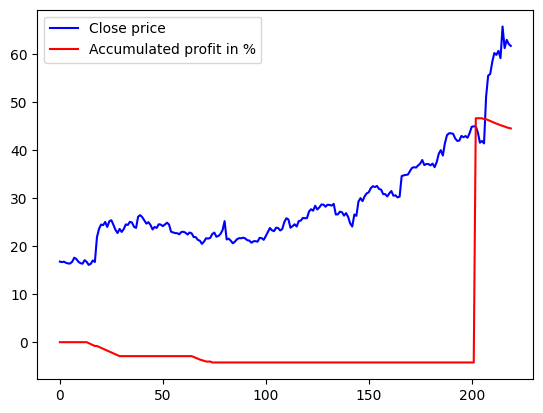

In [51]:
profits = np.cumsum(PLTR_1Y['change_pct'])
plt.plot(PLTR_1Y['Close'], color='blue', label='Close price')
plt.plot(profits, color='red', label='Accumulated profit in %')
plt.legend()
plt.show()

In [52]:
PLTR_1Y.loc[PLTR_1Y['change_pct'].idxmax()]

Datetime         2024-10-29 00:00:00-04:00
Open                             44.900002
High                                 45.07
Low                              44.040001
Close                                44.93
Volume                            26154700
rsi                              74.137942
macd                               -0.0285
obv                           1680584000.0
so                               96.194024
action                                sell
change_pct                       50.880605
change_shares                       -105.0
profits                       13680.970167
shares                               420.0
curr_capital                   4810.370039
Name: 202, dtype: object

In [53]:
PLTR_1Y.loc[PLTR_1Y['action'] == 'sell']

,Datetime,Open,High,Low,Close,Volume,rsi,macd,obv,so,action,change_pct,change_shares,profits,shares,curr_capital
202,2024-10-29 00:00:00-04:00,44.900002,45.07,44.040001,44.93,26154700,74.137942,-0.0285,1.680584e+09,96.194024,sell,50.880605,-105.0,13680.970167,420.0,4810.370039


In [54]:
PLTR_1Y.loc[PLTR_1Y['action'] == 'buy']

,Datetime,Open,High,Low,Close,Volume,rsi,macd,obv,so,action,change_pct,change_shares,profits,shares,curr_capital
14,2024-01-31 00:00:00-05:00,16.410000,16.760000,16.070000,16.090000,43582500,40.342347,0.048110,-3.304782e+08,25.652195,buy,-0.199516,124.0,0.000000,124.0,8004.839981
15,2024-02-01 00:00:00-05:00,16.209999,16.487000,16.030001,16.330000,40454400,43.210212,0.033303,-2.900238e+08,14.890060,buy,-0.199922,98.0,29.759972,222.0,6404.499989
16,2024-02-02 00:00:00-05:00,16.340000,17.020000,16.145000,17.020000,56983900,50.567659,0.069286,-2.330399e+08,19.114194,buy,-0.199313,75.0,182.940090,297.0,5127.999954
17,2024-02-05 00:00:00-05:00,17.559999,17.870001,16.480000,16.719999,167698300,47.675574,0.071879,-4.007382e+08,28.448246,buy,-0.198892,61.0,93.839750,358.0,4108.079996
19,2024-02-07 00:00:00-05:00,21.600000,23.870001,21.379999,23.600000,254911100,78.553992,0.698492,2.746748e+08,73.752266,buy,-0.195322,34.0,2556.880133,392.0,3305.679983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2024-11-15 00:00:00-05:00,61.009998,66.000000,60.910000,65.769997,155280400,83.218791,1.429041,2.315996e+09,89.467786,buy,-0.135160,2.0,23397.828390,495.0,841.680052
216,2024-11-18 00:00:00-05:00,64.919998,64.919998,58.849998,61.259998,137877600,69.917400,1.130216,2.178118e+09,87.159918,buy,-0.145566,2.0,21165.379221,497.0,719.160055
217,2024-11-19 00:00:00-05:00,59.509998,63.009998,59.264999,62.980000,75557800,71.770568,0.951216,2.253676e+09,89.389102,buy,-0.175149,2.0,22020.219828,499.0,593.200056
218,2024-11-20 00:00:00-05:00,62.590000,63.080002,59.959999,62.119999,58946000,69.466324,0.689886,2.194730e+09,84.514586,buy,-0.104720,1.0,21591.079523,500.0,531.080057
